In [85]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
from sklearn.preprocessing import MinMaxScaler

url followed:
https://www.youtube.com/watch?v=YAJ5XBwlN4o&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=7

In [86]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [108]:
df=pd.read_csv('/content/drive/My Drive/Data_science/Data_science_comptetation/Boston_housing/BostonHousing.txt', header = 0)

In [109]:
import numpy as np
inputs = df.drop('medv', axis=1).to_numpy(dtype='float32')
targets = df['medv'].to_numpy(dtype='float32')


Min Max scaling:

In [110]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
inputs = mm_scaler.fit_transform(inputs)

In [111]:
inputs

array([[0.0000000e+00, 1.7999999e-01, 6.7815244e-02, ..., 2.8723407e-01,
        1.0000000e+00, 8.9679912e-02],
       [2.3592253e-04, 0.0000000e+00, 2.4230205e-01, ..., 5.5319142e-01,
        1.0000000e+00, 2.0447019e-01],
       [2.3569773e-04, 0.0000000e+00, 2.4230205e-01, ..., 5.5319142e-01,
        9.8973721e-01, 6.3465789e-02],
       ...,
       [6.1189244e-04, 0.0000000e+00, 4.2045456e-01, ..., 8.9361703e-01,
        1.0000000e+00, 1.0789183e-01],
       [1.1607299e-03, 0.0000000e+00, 4.2045456e-01, ..., 8.9361703e-01,
        9.9130064e-01, 1.3107064e-01],
       [4.6184164e-04, 0.0000000e+00, 4.2045456e-01, ..., 8.9361703e-01,
        1.0000000e+00, 1.6970198e-01]], dtype=float32)

In [112]:
targets=targets.reshape(-1,1)

In [113]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs,targets, test_size=0.2, random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [114]:
inputs=torch.from_numpy(inputs.astype(np.float32))
targets=torch.from_numpy(targets.astype(np.float32))

In [115]:
n_samples,n_features=inputs.shape

In [116]:
n_features

13

In [117]:
#1) model:
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)
#2)loss and optimizer:
learning_rate=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)



In [118]:
model.parameters

<bound method Module.parameters of Linear(in_features=13, out_features=1, bias=True)>

In [119]:
#3) training loop:
num_epochs=1000
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted=model(inputs)
  loss=criterion(y_predicted,targets)
  #backward pass:
  loss.backward()
  #update
  optimizer.step()
  optimizer.zero_grad()
  if(epoch+1)%10==0:
    print(f'epoch:{epoch+1},loss={loss.item():.4f}')

epoch:10,loss=232.7095
epoch:20,loss=132.8479
epoch:30,loss=106.8322
epoch:40,loss=96.8347
epoch:50,loss=90.7243
epoch:60,loss=85.9022
epoch:70,loss=81.7650
epoch:80,loss=78.1333
epoch:90,loss=74.9230
epoch:100,loss=72.0760
epoch:110,loss=69.5449
epoch:120,loss=67.2890
epoch:130,loss=65.2734
epoch:140,loss=63.4675
epoch:150,loss=61.8447
epoch:160,loss=60.3820
epoch:170,loss=59.0594
epoch:180,loss=57.8594
epoch:190,loss=56.7667
epoch:200,loss=55.7683
epoch:210,loss=54.8527
epoch:220,loss=54.0097
epoch:230,loss=53.2307
epoch:240,loss=52.5082
epoch:250,loss=51.8355
epoch:260,loss=51.2069
epoch:270,loss=50.6173
epoch:280,loss=50.0624
epoch:290,loss=49.5383
epoch:300,loss=49.0418
epoch:310,loss=48.5699
epoch:320,loss=48.1201
epoch:330,loss=47.6901
epoch:340,loss=47.2781
epoch:350,loss=46.8823
epoch:360,loss=46.5012
epoch:370,loss=46.1335
epoch:380,loss=45.7781
epoch:390,loss=45.4340
epoch:400,loss=45.1002
epoch:410,loss=44.7760
epoch:420,loss=44.4607
epoch:430,loss=44.1537
epoch:440,loss=43

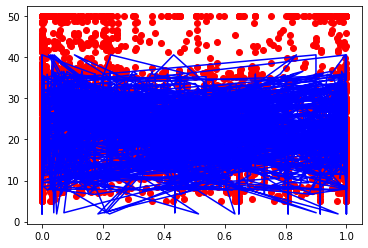

In [120]:
#plot
predicted=model(inputs).detach().numpy()
plt.plot(inputs,targets,'ro')
plt.plot(inputs,predicted,'b')
plt.show()

In [121]:
  y_predicted



tensor([[28.2434],
        [25.3594],
        [28.4194],
        [28.0606],
        [28.0959],
        [26.0778],
        [24.4543],
        [23.8400],
        [19.4703],
        [23.5257],
        [24.0213],
        [24.6239],
        [22.6828],
        [22.1871],
        [22.1044],
        [21.6601],
        [21.7383],
        [20.7876],
        [16.9496],
        [20.7002],
        [18.0068],
        [21.1554],
        [20.5878],
        [19.4634],
        [20.5978],
        [17.4222],
        [20.2199],
        [18.6400],
        [22.9731],
        [23.3655],
        [17.6399],
        [21.4988],
        [13.9466],
        [18.5895],
        [16.7701],
        [22.8035],
        [21.5591],
        [22.3873],
        [22.0992],
        [29.5251],
        [31.2333],
        [25.9780],
        [24.0264],
        [23.9923],
        [23.5322],
        [22.2469],
        [21.5643],
        [21.9975],
        [17.4986],
        [21.1359],
        [24.0775],
        [25.7741],
        [27.

In [122]:
targets

tensor([[24.0000],
        [21.6000],
        [34.7000],
        [33.4000],
        [36.2000],
        [28.7000],
        [22.9000],
        [27.1000],
        [16.5000],
        [18.9000],
        [15.0000],
        [18.9000],
        [21.7000],
        [20.4000],
        [18.2000],
        [19.9000],
        [23.1000],
        [17.5000],
        [20.2000],
        [18.2000],
        [13.6000],
        [19.6000],
        [15.2000],
        [14.5000],
        [15.6000],
        [13.9000],
        [16.6000],
        [14.8000],
        [18.4000],
        [21.0000],
        [12.7000],
        [14.5000],
        [13.2000],
        [13.1000],
        [13.5000],
        [18.9000],
        [20.0000],
        [21.0000],
        [24.7000],
        [30.8000],
        [34.9000],
        [26.6000],
        [25.3000],
        [24.7000],
        [21.2000],
        [19.3000],
        [20.0000],
        [16.6000],
        [14.4000],
        [19.4000],
        [19.7000],
        [20.5000],
        [25.

In [123]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs,targets, test_size=0.2, random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([404, 13])
torch.Size([102, 13])
torch.Size([404, 1])
torch.Size([102, 1])


In [124]:
#1) model:
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)
#2)loss and optimizer:
learning_rate=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [125]:
#3) training loop:
num_epochs=1000
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted_test=model(x_test)
  loss=criterion(y_predicted_test,y_test)
  #backward pass:
  loss.backward()
  #update
  optimizer.step()
  optimizer.zero_grad()
  if(epoch+1)%10==0:
    print(f'epoch:{epoch+1},loss={loss.item():.4f}')

epoch:10,loss=246.4352
epoch:20,loss=138.8820
epoch:30,loss=108.9938
epoch:40,loss=96.4370
epoch:50,loss=88.3784
epoch:60,loss=81.9974
epoch:70,loss=76.5965
epoch:80,loss=71.9402
epoch:90,loss=67.9025
epoch:100,loss=64.3915
epoch:110,loss=61.3320
epoch:120,loss=58.6600
epoch:130,loss=56.3209
epoch:140,loss=54.2680
epoch:150,loss=52.4612
epoch:160,loss=50.8660
epoch:170,loss=49.4531
epoch:180,loss=48.1972
epoch:190,loss=47.0765
epoch:200,loss=46.0726
epoch:210,loss=45.1695
epoch:220,loss=44.3536
epoch:230,loss=43.6130
epoch:240,loss=42.9378
epoch:250,loss=42.3193
epoch:260,loss=41.7501
epoch:270,loss=41.2238
epoch:280,loss=40.7350
epoch:290,loss=40.2789
epoch:300,loss=39.8515
epoch:310,loss=39.4493
epoch:320,loss=39.0694
epoch:330,loss=38.7091
epoch:340,loss=38.3662
epoch:350,loss=38.0389
epoch:360,loss=37.7255
epoch:370,loss=37.4245
epoch:380,loss=37.1347
epoch:390,loss=36.8550
epoch:400,loss=36.5845
epoch:410,loss=36.3225
epoch:420,loss=36.0681
epoch:430,loss=35.8209
epoch:440,loss=35

In [128]:
y_predicted_test

tensor([[20.5794],
        [19.8349],
        [31.8724],
        [27.0464],
        [ 7.4980],
        [12.4786],
        [28.1205],
        [28.3729],
        [ 9.5067],
        [23.0830],
        [25.8743],
        [28.0580],
        [22.8866],
        [17.6431],
        [17.3911],
        [25.4664],
        [22.1887],
        [15.3548],
        [ 8.6014],
        [18.4111],
        [23.7230],
        [20.9979],
        [31.3102],
        [19.2043],
        [17.6995],
        [16.7640],
        [29.6284],
        [35.3477],
        [33.7635],
        [25.4417],
        [14.8936],
        [22.6983],
        [31.1633],
        [30.4550],
        [14.9941],
        [16.8440],
        [15.0288],
        [19.9192],
        [23.7039],
        [21.8874],
        [27.6415],
        [18.0903],
        [27.6268],
        [11.2527],
        [19.4282],
        [18.5886],
        [31.4666],
        [18.5371],
        [30.7416],
        [ 2.2510],
        [27.1635],
        [29.1855],
        [12.

In [127]:
y_test

tensor([[20.2000],
        [15.3000],
        [37.3000],
        [32.5000],
        [ 8.8000],
        [14.4000],
        [22.0000],
        [26.6000],
        [15.0000],
        [21.5000],
        [29.4000],
        [24.8000],
        [22.0000],
        [16.1000],
        [13.9000],
        [21.6000],
        [21.7000],
        [12.8000],
        [ 7.2000],
        [12.6000],
        [20.7000],
        [19.3000],
        [36.5000],
        [17.7000],
        [16.7000],
        [20.2000],
        [50.0000],
        [34.6000],
        [35.4000],
        [19.4000],
        [20.8000],
        [21.1000],
        [31.1000],
        [23.5000],
        [ 8.3000],
        [15.6000],
        [11.3000],
        [21.7000],
        [23.2000],
        [20.8000],
        [22.0000],
        [13.6000],
        [28.7000],
        [10.5000],
        [23.0000],
        [13.8000],
        [36.4000],
        [18.4000],
        [30.1000],
        [17.9000],
        [29.9000],
        [30.7000],
        [ 5.

In [129]:
print(y_predicted_test.shape)
print(y_test.shape)
print(y_predicted.shape)
print(targets.shape)

torch.Size([102, 1])
torch.Size([102, 1])
torch.Size([506, 1])
torch.Size([506, 1])
